<a href="https://colab.research.google.com/github/Vishwarajsinh/python/blob/master/RSI_INDICATOR_STRETEGY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
plt.style.use('fivethirtyeight')

In [36]:
startDate = '2019-10-10'

df = web.DataReader('^NSEI', data_source='yahoo', start = startDate)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-10,11293.349609,11208.549805,11280.500000,11234.549805,562000.0,11234.549805
2019-10-11,11362.900391,11189.400391,11257.700195,11305.049805,737800.0,11305.049805
2019-10-14,11420.450195,11290.049805,11335.900391,11341.150391,587600.0,11341.150391
2019-10-15,11462.349609,11342.099609,11360.849609,11428.299805,527400.0,11428.299805
2019-10-16,11481.049805,11411.099609,11464.950195,11464.000000,533500.0,11464.000000


In [37]:
df.shape

(256, 6)

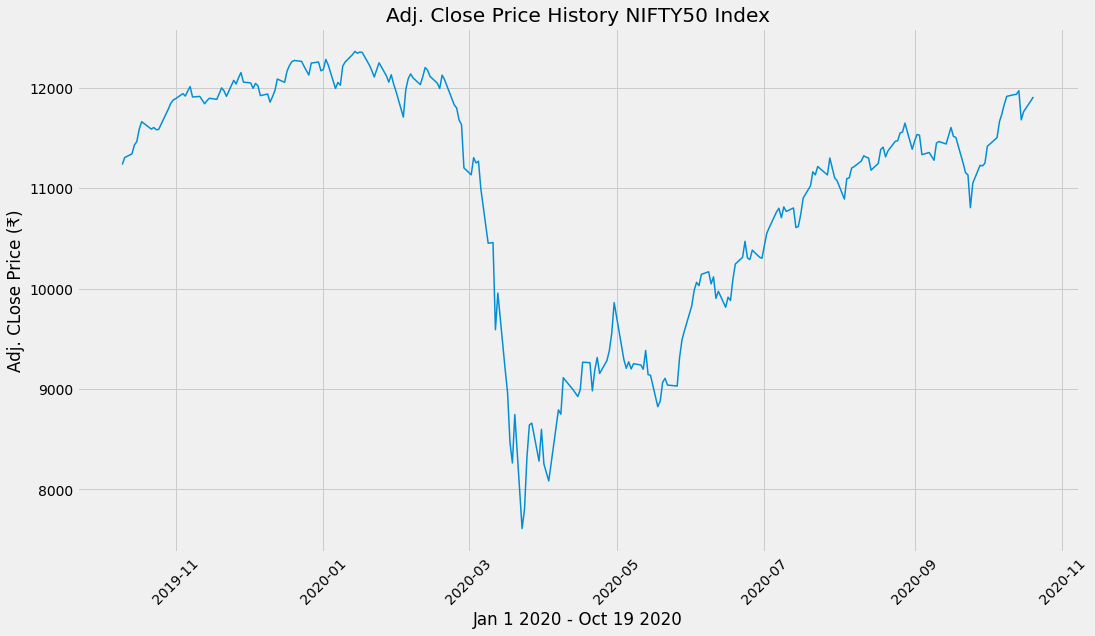

In [38]:
plt.figure(figsize = (16, 9))
plt.rcParams['lines.linewidth'] = 1.5
plt.plot(df['Adj Close'], label = 'Adj Close')
plt.xticks(rotation = 45)
plt.title('Adj. Close Price History NIFTY50 Index')
plt.xlabel('Jan 1 2020 - Oct 19 2020')
plt.ylabel('Adj. CLose Price (₹)')
plt.show()

In [39]:
# Prepare variables to calculate RSI

# Get the difference in price from previous day
delta = df['Adj Close'].diff(1)
delta.head()

Date
2019-10-10          NaN
2019-10-11    70.500000
2019-10-14    36.100586
2019-10-15    87.149414
2019-10-16    35.700195
Name: Adj Close, dtype: float64

In [40]:
# Get rid of null values
delta = delta.dropna()
delta.head()

Date
2019-10-11     70.500000
2019-10-14     36.100586
2019-10-15     87.149414
2019-10-16     35.700195
2019-10-17    122.349609
Name: Adj Close, dtype: float64

In [41]:
# Get negative (down) and positive (up) gains 
up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0

In [42]:
# Get the time period 
period = 14

# Calculate avg gain and avg loss
avg_gain = up.rolling(window = period).mean()
avg_loss = abs(down.rolling(window = period).mean())

In [43]:
# Calculate RSI

# Calculate Relative Strength (RS)
RS = avg_gain / avg_loss

# Calculate RSI
RSI = 100.0 - (100.0 / (1.0 + RS))

<function matplotlib.pyplot.show>

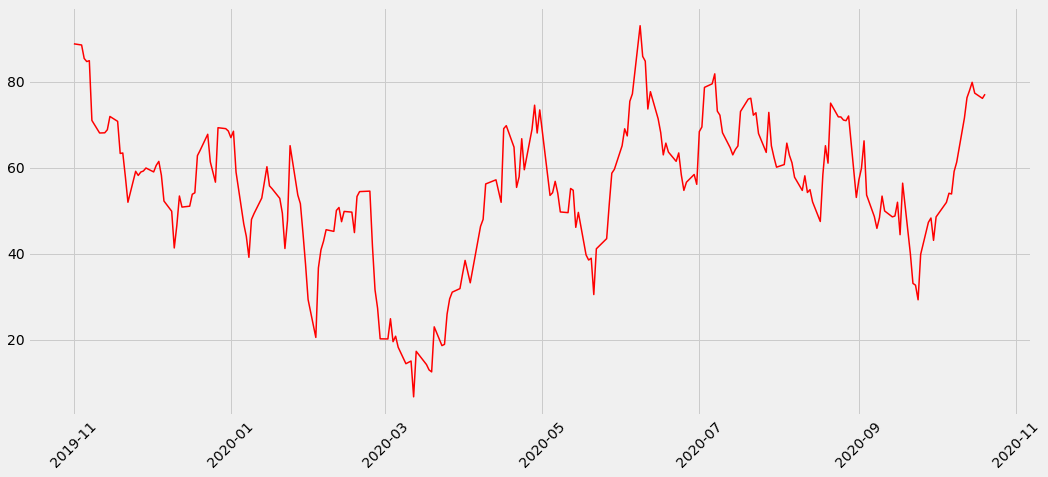

In [44]:
# RSI Visualization
# Plot the chart
plt.figure(figsize = (16, 7))
plt.rcParams['lines.linewidth'] = 1.5
plt.xticks(rotation = 45)
plt.plot(RSI, color = 'red')
plt.show

In [45]:
# Putting data togather

new_df = pd.DataFrame()
new_df['Adj. Close'] = df['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj. Close,RSI
2019-10-10,11234.549805,NaN
2019-10-11,11305.049805,NaN
2019-10-14,11341.150391,NaN
2019-10-15,11428.299805,NaN
2019-10-16,11464.000000,NaN
...,...,...
2020-10-14,11971.049805,77.934257
2020-10-15,11680.349609,79.826130
2020-10-16,11762.450195,77.310396
2020-10-19,11873.049805,76.087149


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

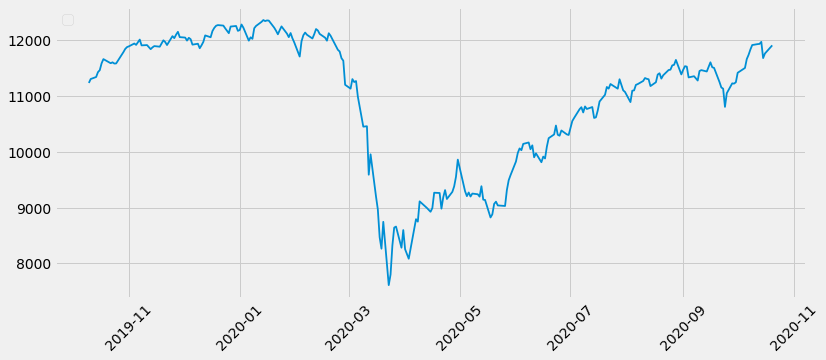

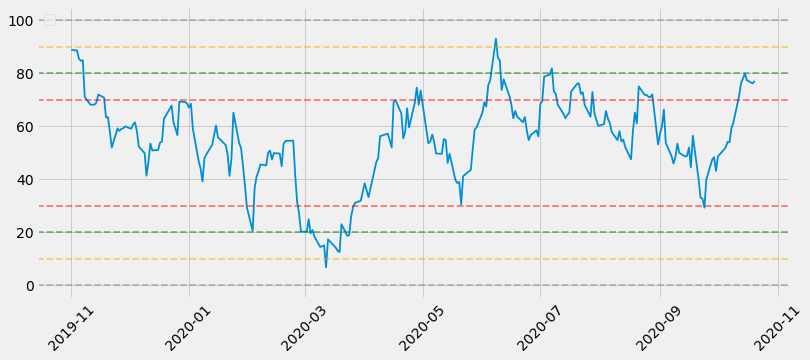

In [47]:
# Adj. Close and RSI visualization
# Plot the chart
plt.figure(figsize = (12, 5))
plt.rcParams['lines.linewidth'] = 1.8
plt.xticks(rotation = 45)
plt.plot(df.index, new_df['Adj. Close'])
plt.legend(loc = 'upper left')
plt.show

#Plot corresponding RSI
plt.figure(figsize = (12, 5))
plt.rcParams['lines.linewidth'] = 1.8
plt.xticks(rotation = 45)
plt.plot(df.index, new_df['RSI'])
plt.axhline(0, linestyle = '--', alpha = 0.5, color = 'grey')
plt.axhline(10, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(20, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(30, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(70, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(80, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(90, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(100, linestyle = '--', alpha = 0.5, color = 'grey')
plt.legend(loc = 'upper left')
plt.show